In [1]:
import random
import math
import scipy
from scipy import stats as st
import numpy as np
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

from scipy.stats import beta,norm,binom
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



import warnings
warnings.filterwarnings("ignore")

# Problem 1: Solve minimize f(x) = x^2 − sin(x)^e^x + normcdf(x) + e^−x \
### such that 0 <= x <= 64

In [57]:
def binary2decimal(x): 
    value = 0
    length = len(x)
    
    for j in range(length):
        value += math.pow(2,length-1-j)*x[j]
    return value

def objective(x):
    objVal = x**2 - math.pow(math.sin(x),math.exp(x)) + st.norm.cdf(x) + math.exp(-x)
    return (objVal)
    
def simulated_annealing(function, boundaries, n, step, benchmark):
    collect = []
    t = 10
    # Setup
    current_solution = [1,1,1,1,1,0]
    x_init = binary2decimal(current_solution)
    y_init = function(x_init)
    
    # Best values
    x_best, y_best = x_init, y_init
    
    # Algo
    for i in range(n):
        t = t*(1 - i/n)
        # Define a step
        xCand = x_best + randn(len(boundaries)) * step
        yCand = function(xCand)
        
        
        if abs(yCand - y_best) < benchmark and i > 2:
            df = pd.DataFrame(collect, columns = ['i', 'x', 'y'])
            break        
        
        if yCand < y_best:
            # define new best
            x_best, y_best = xCand, yCand
            print('iteration: {} | f({}) = {}'.format(i, x_best, y_best))
            collect.append([i, x_best, y_best])
            continue

        # randomness component
        d = yCand - y_best
        print(exp(-d / t), rand())
        if rand() < exp(-d / t):
            x_best, y_best = xCand, yCand
            collect.append([i, x_best, y_best])
            print('random! iteration: {} | f({}) = {}'.format(i, x_best, y_best))

        
    return x_best, y_best, df


In [58]:
seed(1)

boundaries = asarray([[0, 64]])
n = 10000
step = 0.02
benchmark = 10**(-4)

solution, value, df = simulated_annealing(objective, boundaries, n, step, benchmark)

print('Solution found!  f({}) = {}'.format(solution, value))

[0.66835007] 0.00011437481734488664
random! iteration: 0 | f([62.03248691]) = [3849.0294319]
iteration: 1 | f([62.02025178]) = [3847.51163073]
iteration: 2 | f([62.00968834]) = [3846.20144851]
iteration: 3 | f([61.98822897]) = [3843.54053102]
[0.80668256] 0.4191945144032948
random! iteration: 4 | f([62.00553712]) = [3845.68663405]
iteration: 5 | f([61.95950635]) = [3839.98042716]
[0.92381785] 0.027387593197926163
random! iteration: 6 | f([61.96588713]) = [3840.77116807]
iteration: 7 | f([61.96089972]) = [3840.15309468]
[0.695053] 0.14038693859523377
random! iteration: 8 | f([61.99014188]) = [3843.77769071]
iteration: 9 | f([61.94893907]) = [3838.67105179]
[0.75386276] 0.8763891522960383
iteration: 11 | f([61.92694124]) = [3835.94605181]
iteration: 12 | f([61.92349268]) = [3835.51894564]
iteration: 13 | f([61.90593551]) = [3833.34485153]
[0.98949201] 0.6918771139504734
random! iteration: 14 | f([61.90677979]) = [3833.4493835]
[0.86409048] 0.6865009276815837
random! iteration: 15 | f([61

iteration: 526 | f([59.18927172]) = [3504.36988697]
iteration: 527 | f([59.16237152]) = [3501.18620405]
iteration: 528 | f([59.13646636]) = [3498.12165399]
[0.] 0.07457407125147986
[0.] 0.4139198457294089
iteration: 531 | f([59.11866093]) = [3496.01607048]
iteration: 532 | f([59.10186115]) = [3494.02999192]
iteration: 533 | f([59.05589704]) = [3488.59897482]
[0.] 0.48719390907342375
[0.] 0.26199970471933565
[0.] 0.35520938933964374
iteration: 537 | f([59.03643169]) = [3486.30026611]
iteration: 538 | f([59.03277045]) = [3485.86798646]
iteration: 539 | f([59.02834987]) = [3485.34608806]
[0.] 0.3092463846587796
[0.] 0.22759773832225305
[0.] 0.8730943782696405
iteration: 543 | f([59.02594687]) = [3485.06240364]
[0.] 0.49582639708521237
iteration: 545 | f([59.02361798]) = [3484.78748002]
[0.] 0.38698923425629217
iteration: 547 | f([59.01987888]) = [3484.34610355]
[0.] 0.38326345680528673
iteration: 549 | f([59.01339824]) = [3483.58117159]
iteration: 550 | f([58.99610164]) = [3481.54000861]


[0.] 0.7165880467947342
iteration: 955 | f([55.72451451]) = [3106.22151727]
[0.] 0.9199535770148588
iteration: 957 | f([55.71715786]) = [3105.40168055]
iteration: 958 | f([55.70224498]) = [3103.74009626]
[0.] 0.3907730736706927
[0.] 0.6065354305165435
[0.] 0.14674737976077956
[0.] 0.5431640475192038
[0.] 0.30218150041580416
[0.] 0.2015966344081711
[0.] 0.742921250389697
iteration: 966 | f([55.7017978]) = [3103.69027777]
iteration: 967 | f([55.6737884]) = [3100.57071447]
[0.] 0.9025365564222451
[0.] 0.7533800731255857
iteration: 970 | f([55.64529118]) = [3097.39843039]
iteration: 971 | f([55.62722232]) = [3095.38786353]
iteration: 972 | f([55.59968466]) = [3092.32493469]
iteration: 973 | f([55.59135348]) = [3091.39858201]
iteration: 974 | f([55.57620446]) = [3089.71450238]
iteration: 975 | f([55.56895154]) = [3088.90837563]
[0.] 0.9231006825886638
[0.] 0.4577052876804192
iteration: 978 | f([55.53978482]) = [3085.66769836]
[0.] 0.5216593134132719
[0.] 0.9299930889635013
iteration: 981 | 

iteration: 1301 | f([53.04625928]) = [2814.90562404]
iteration: 1302 | f([53.02024981]) = [2812.14688976]
[0.] 0.24975975428670383
iteration: 1304 | f([53.01973149]) = [2812.0919269]
iteration: 1305 | f([52.98064765]) = [2807.94902544]
[0.] 0.9811085630636269
iteration: 1307 | f([52.98057105]) = [2807.94090893]
iteration: 1308 | f([52.9372725]) = [2803.35481974]
[0.] 0.9676088975125462
iteration: 1310 | f([52.93120548]) = [2802.71251332]
iteration: 1311 | f([52.9025212]) = [2799.67674967]
[0.] 0.7934846741670334
iteration: 1313 | f([52.87709785]) = [2796.98747692]
[0.] 0.6460907214959392
[0.] 0.9520910857128398
[0.] 0.6849239969048068
[0.] 0.15657242459837717
[0.] 0.0026317961255032385
iteration: 1319 | f([52.86594117]) = [2795.80773577]
iteration: 1320 | f([52.83696612]) = [2792.74498922]
iteration: 1321 | f([52.83613859]) = [2792.65754076]
iteration: 1322 | f([52.81788238]) = [2790.72869962]
[0.] 0.8838175899975118
[0.] 0.8421791188670099
iteration: 1325 | f([52.80951991]) = [2789.84

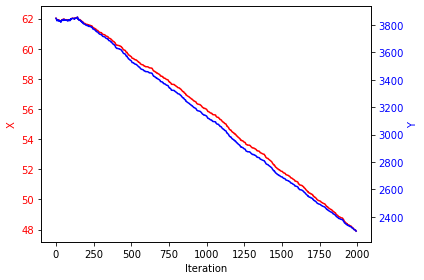

In [56]:
# Plot the process
fig, ax1 = plt.subplots()

color_1 = 'red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('X', color=color_1)
ax1.plot(df.i, df.x, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx()

color_2 = 'blue'
ax2.set_ylabel('Y', color=color_2)
ax2.plot(df.i, df.y, color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()

# Problem 2: Multi Armed Bandit

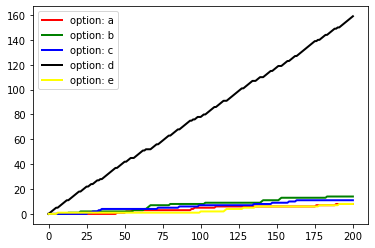

In [42]:
# Prior
A = [random.randrange(5,10),random.randrange(5,10),random.randrange(5,10),random.randrange(5,10),random.randrange(5,10)]
B = [random.randrange(25,50)]*5

# Posterior
# posterior = [[A[0],B[0]],[A[1],B[0]],[A[2],B[0]],[A[3],B[0]],[A[4],B[0]]]
posterior = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
prob = [0.25, 0.30, 0.35, 0.6, 0.4]

# Parameters
# count = [[100],[100],[100],[100], [100]]
epsilon = 0.25
count = [[0], [0], [0], [0], [0]]


# for 20000 new users
for i in range(200):
    for j in range(5):
        count[j].append(count[j][-1])
    optMax = np.argmax(prob)
    others = [0,1,2,3,4]
    others.remove(optMax)
    r = np.random.uniform(0,1)
    
    # select the best based on probability
    if r < 1-epsilon:
        draw = np.random.binomial(1,A[optMax]/B[optMax],1)
        posterior[optMax][0] += len(draw)
        posterior[optMax][1] += sum(draw)
        
    # select others randomly
    else:
        optMax = np.random.choice(others)
        draw = np.random.binomial(1,A[optMax]/B[optMax],1)
        posterior[optMax][0] += len(draw)
        posterior[optMax][1] += sum(draw)
    
    count[optMax][-1] += 1

lab = ['a','b','c','d', 'e']
color = ['r','g','b','black','yellow']

for j in range(5):
    plt.plot(count[j],linewidth=2,color=color[j],label='option: '+str(lab[j]))
plt.legend();

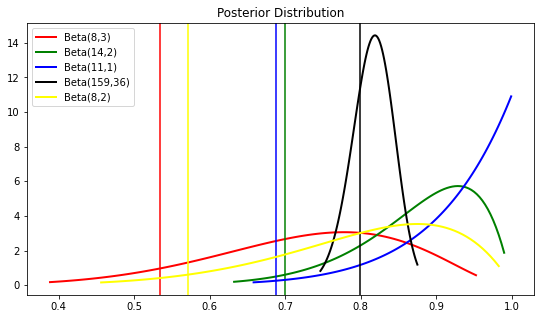

In [43]:
# Plotting posterior
fig = plt.figure(figsize=(20, 5))

plt.subplot(1,2,2)
for j in range(5):
    a, b = posterior[j][0], posterior[j][1]
    mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

    x  = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
    rv = beta(a, b)
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label="Beta("+str(a)+","+str(b)+")",c=color[j])
    plt.axvline(x=a/(4+b+a),c=color[j])

plt.legend()
plt.title("Posterior Distribution");